In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
from IPython.display import display, HTML

#original data from http://www.ilo.org/ilostat/faces/oracle/webcenter/portalapp/pagehierarchy/Page27.jspx?indicator=EAR_4MTH_SEX_OCU_CUR_NB&subject=EAR&datasetCode=A&collectionCode=YI&_adf.ctrl-state=d9h8of9o1_4&_afrLoop=709921039136290&_afrWindowMode=0&_afrWindowId=null#!%40%40%3Findicator%3DEAR_4MTH_SEX_OCU_CUR_NB%26_afrWindowId%3Dnull%26subject%3DEAR%26_afrLoop%3D709921039136290%26datasetCode%3DA%26collectionCode%3DYI%26_afrWindowMode%3D0%26_adf.ctrl-state%3Di743j8tal_4
#import df with ILO data on mean salaries, divided by occupation type
ILO = (pd.read_csv('Mean_occupation_sex_ILO.csv',index_col=0,delimiter=";",engine="python"))
ILO.index=ILO.index.rename("Country")
ILO.head()#data missing for Croatia and Lithuania


,Sex,Occupation,Currency,Survey,Type of Source,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,
Austria,Male (Sex),1. Managers (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,7336.0,NaN,NaN,NaN,8144.0,NaN,NaN,NaN
Austria,Male (Sex),2. Professionals (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,5030.0,NaN,NaN,NaN,5560.0,NaN,NaN,NaN
Austria,Male (Sex),3. Technicians and associate professionals (IS...,Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,4125.0,NaN,NaN,NaN,4495.0,NaN,NaN,NaN
Austria,Male (Sex),4. Clerical support workers (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,3309.0,NaN,NaN,NaN,3607.0,NaN,NaN,NaN
Austria,Male (Sex),5. Service and sales workers (ISCO-08),Constant 2011 PPP $ (Currency),Structure of Earnings Survey,Establishment survey,2448.0,NaN,NaN,NaN,2651.0,NaN,NaN,NaN


In [2]:
#select the most recent year for each country (there must me a better way but couldnt find it)

index2017=(ILO[ILO["2017"].notna()].index.unique())

index2016=ILO[ILO["2016"].notna()].index.unique()
index2016=index2016[~index2016.isin(index2017)]

index2015=ILO[ILO["2015"].notna()].index.unique()
index2015=index2015[~index2015.isin(index2017 | index2016)]

index2014=ILO[ILO["2014"].notna()].index.unique()
index2014=index2014[~index2014.isin(index2017 | index2016 | index2015)]

index2013=ILO[ILO["2013"].notna()].index.unique()
index2013=index2013[~index2013.isin(index2017 | index2016 | index2015 | index2014)]


display(index2017)
display(index2016)
display(index2015)
display(index2014)
display(index2013)


Index(['United Kingdom'], dtype='object', name='Country')

Index(['Czech Republic', 'Greece', 'Portugal', 'Romania', 'Slovakia',
       'Slovenia'],
      dtype='object', name='Country')

Index(['Austria', 'Belgium', 'Finland', 'Hungary', 'Spain'], dtype='object', name='Country')

Index(['Bulgaria', 'Cyprus', 'Denmark', 'Estonia', 'France', 'Germany',
       'Ireland', 'Italy', 'Latvia', 'Luxembourg', 'Malta', 'Netherlands',
       'Poland', 'Sweden'],
      dtype='object', name='Country')

Index([], dtype='object', name='Country')

In [3]:
#get rid of columns we don't need
ILO=ILO.drop(columns=["2010","2011","2012","2013"])


In [4]:
#select the country based on the years identified above
ILO2017=ILO[ILO.index.get_level_values(0).isin(index2017)].drop(columns=["2014","2015","2016"]).dropna()
ILO2016=ILO[ILO.index.get_level_values(0).isin(index2016)].drop(columns=["2014","2015","2017"]).dropna()
ILO2015=ILO[ILO.index.get_level_values(0).isin(index2015)].drop(columns=["2014","2016","2017"]).dropna()
ILO2014=ILO[ILO.index.get_level_values(0).isin(index2014)].drop(columns=["2015","2016","2017"]).dropna()


In [5]:
#Rename the columns, re-unify the df in a single one 
ILO2017["Year"]="2017"
ILO2017=ILO2017.rename(index=str, columns={"2017": "Mean"})

ILO2016["Year"]="2016"
ILO2016=ILO2016.rename(index=str, columns={"2016": "Mean"})

ILO2015["Year"]="2015"
ILO2015=ILO2015.rename(index=str, columns={"2015": "Mean"})

ILO2014["Year"]="2014"
ILO2014=ILO2014.rename(index=str, columns={"2014": "Mean"})

frames=[ILO2017,ILO2016,ILO2015,ILO2014]
ILObis=pd.concat(frames,axis=0)
ILObis

,Sex,Occupation,Currency,Survey,Type of Source,Mean,Year
Country,,,,,,,
United Kingdom,Male (Sex),1. Managers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,6003.0,2017
United Kingdom,Male (Sex),2. Professionals (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,4832.0,2017
United Kingdom,Male (Sex),3. Technicians and associate professionals (IS...,Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,3643.0,2017
United Kingdom,Male (Sex),4. Clerical support workers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2470.0,2017
United Kingdom,Male (Sex),5. Service and sales workers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2302.0,2017
United Kingdom,Male (Sex),"6. Skilled agricultural, forestry and fishery ...",Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2206.0,2017
United Kingdom,Male (Sex),7. Craft and related trades workers (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,3143.0,2017
United Kingdom,Male (Sex),"8. Plant and machine operators, and assemblers...",Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,2738.0,2017
United Kingdom,Male (Sex),9. Elementary occupations (ISCO-08),Constant 2011 PPP $ (Currency),Annual Survey of Hours and Earnings,Establishment survey,1943.0,2017


In [6]:
#import the OECD data with gap as difference with median salaries. change country codes, select most recent year, keep only relevant data in final DF

gapOECD=(pd.read_csv('GapOECD.csv', delimiter=";"))

ListEU= {"AUT":"Austria","BEL" : "Belgium", "BGR" : "Bulgaria", "CYP":"Cyprus","CZE":"Czech Republic","DEU":"Germany","DNK":"Denmark","ESP":"Spain","EST":"Estonia","FIN":"Finland","FRA":"France","GBR":"United Kingdom","GRC":"Greece","HUN":"Hungary","IRL":"Irleand","ITA":"Italy","LTU":"Lithuania","LUX":"Luxembourg","LVA":"Latvia","MLT":"Malta","NLD":"Neatherlands","POL":"Poland","PRT":"Portugal","ROU":"Romania","SVK":"Slovakia","SVN":"Slovenia","SWE":"Sweden"}
gapOECD['Country'] = gapOECD["LOCATION"].map(ListEU)
gapOECD=(gapOECD.sort_values(['Country', 'TIME'], ascending=[True, False]).drop_duplicates(['Country']).set_index(["Country"]))
gapOECD = gapOECD.rename(columns={'Value': 'MedianSalGap'})
gapOECDmini=gapOECD[["MedianSalGap"]]
gapOECDmini

,MedianSalGap
Country,
Austria,15.670900
Belgium,4.672000
Bulgaria,4.062500
Cyprus,13.409235
Czech Republic,15.614011
Denmark,5.732628
Estonia,28.339350
Finland,16.472258
France,9.872102


In [7]:
#back to ILO database. reset the index, pivot it to maintain only the data relevant and have data in two columns for gender
ILObis=ILObis.reset_index()
ILObis2 = pd.pivot_table(ILObis, index=['Country','Occupation'], columns='Sex', values='Mean')

In [8]:
#create ratio between mean female and male salary

ILObis2["ratioMeanWage"]=ILObis2["Female (Sex)"]/ILObis2["Male (Sex)"] 
display(ILObis2)

Sex                                                                Female (Sex)  \
Country        Occupation                                                         
Austria        1. Managers (ISCO-08)                                     5556.0   
               2. Professionals (ISCO-08)                                3925.0   
               3. Technicians and associate professionals (ISC...        3028.0   
               4. Clerical support workers (ISCO-08)                     2610.0   
               5. Service and sales workers (ISCO-08)                    1674.0   
               6. Skilled agricultural, forestry and fishery w...        1441.0   
               7. Craft and related trades workers (ISCO-08)             2101.0   
               8. Plant and machine operators, and assemblers ...        2207.0   
               9. Elementary occupations (ISCO-08)                       1433.0   
               TOTAL. Total (ISCO-08)                                    2531.0   
Belgium        1. Managers (ISCO-08)                                     7226.0   
               2. Professionals (ISCO-08)                                5081.0   
               3. Technicians and associate professionals (ISC...        3873.0   
               4. Clerical support workers (ISCO-08)                     3279.0   
               5. Service and sales workers (ISCO-08)                    2118.0   
               7. Craft and related trades workers (ISCO-08)             2839.0   
               8. Plant and machine operators, and assemblers ...        2930.0   
               9. Elementary occupations (ISCO-08)                       1874.0   
               TOTAL. Total (ISCO-08)                                    3286.0   
Bulgaria       1. Managers (ISCO-08)                                     2771.0   
               2. Professionals (ISCO-08)                                1591.0   
               3. Technicians and associate professionals (ISC...        1497.0   
               4. Clerical support workers (ISCO-08)                     1048.0   
               5. Service and sales workers (ISCO-08)                     789.0   
               6. Skilled agricultural, forestry and fishery w...        2443.0   
               7. Craft and related trades workers (ISCO-08)              830.0   
               8. Plant and machine operators, and assemblers ...         857.0   
               9. Elementary occupations (ISCO-08)                        702.0   
               TOTAL. Total (ISCO-08)                                    1168.0   
Cyprus         1. Managers (ISCO-08)                                     5426.0   
...                                                                         ...   
Spain          1. Managers (ISCO-08)                                     5399.0   
               2. Professionals (ISCO-08)                                3980.0   
               3. Technicians and associate professionals (ISC...        2993.0   
               4. Clerical support workers (ISCO-08)                     2473.0   
               5. Service and sales workers (ISCO-08)                    1714.0   
               6. Skilled agricultural, forestry and fishery w...        1987.0   
               7. Craft and related trades workers (ISCO-08)             1951.0   
               8. Plant and machine operators, and assemblers ...        2275.0   
               9. Elementary occupations (ISCO-08)                       1320.0   
               TOTAL. Total (ISCO-08)                                    2463.0   
Sweden         1. Managers (ISCO-08)                                     5590.0   
               2. Professionals (ISCO-08)                                3899.0   
               3. Technicians and associate professionals (ISC...        3620.0   
               4. Clerical support workers (ISCO-08)                     3150.0   
               5. Service and sales workers (ISCO-08)                    2919.0   
               6

In [9]:
EUindex=ILObis2.index.get_level_values(0).unique()

In [10]:
#import data on leaves for mothers and fathers. merge in a single DF

MothersOECD = (pd.read_csv('MothersLeaveOECD.csv',index_col=0,delimiter=";",engine="python"))
MothersOECD.index=MothersOECD.index.rename("Country")
MothersOECD=MothersOECD[["Unnamed: 10"]].dropna()
MothersOECD=MothersOECD.rename(index=str, columns={"Unnamed: 10": "MothersTotPaid"})
MothersOECD=MothersOECD[MothersOECD.index.get_level_values(0).isin(EUindex)]
MothersOECD["MothersTotPaid"]=pd.to_numeric(MothersOECD["MothersTotPaid"],errors='coerce')

FathersOECD = (pd.read_csv('FathersLeaveOECD.csv',index_col=0,delimiter=";",engine="python"))
FathersOECD.index=FathersOECD.index.rename("Country")
FathersOECD=FathersOECD[["Unnamed: 10"]].dropna()
FathersOECD=FathersOECD.rename(index=str, columns={"Unnamed: 10": "FathersTotPaid"})
FathersOECD=FathersOECD[FathersOECD.index.get_level_values(0).isin(EUindex)]
FathersOECD["FathersTotPaid"]=pd.to_numeric(FathersOECD["FathersTotPaid"],errors='coerce')


# create the delta between fathers and mothers paid leave to use as indep. variable
LeavesOECD=pd.merge(FathersOECD, MothersOECD, left_index=True, right_index=True)
LeavesOECD["DeltaPaidLeave"]=LeavesOECD["MothersTotPaid"]-LeavesOECD["FathersTotPaid"]
LeavesOECD

,FathersTotPaid,MothersTotPaid,DeltaPaidLeave
Country,,,
Austria,6.9,51.2,44.3
Belgium,5.0,13.1,8.1
Czech Republic,0.0,53.1,53.1
Denmark,1.1,26.8,25.7
Estonia,2.0,85.0,83.0
Finland,5.7,40.6,34.9
France,5.6,18.8,13.2
Germany,5.7,42.6,36.9
Greece,0.4,23.3,22.9


In [11]:
ILObis2=ILObis2.reset_index()
ILObis2=ILObis2.set_index("Country")
ILObis2.index=ILObis2.index.rename("Country")

In [12]:
#merge all the DF in a single DF. ratioMeanWage (ratio between average salaries, per country and occupation, as calculated by ILO) and MedianSalGap (median salary gap as measured by OECD, per country) are dependent variables and parameters for inequality.
#Fathers Tot Paid, Mothers Tot Paid and DeltaPaidLeave are independent variables that measure the leave entitlements of fathers, mothers and the difference between them.

FinalDFILO=pd.merge(ILObis2, LeavesOECD, left_index=True, right_index=True)
FinalDFILO=FinalDFILO.dropna()
display(FinalDFILO)

FinalDFOECD=pd.merge(FinalDFILO,gapOECDmini,left_index=True, right_index=True)
FinalDFOECD=FinalDFOECD.reset_index()
FinalDFOECD=FinalDFOECD.set_index("Country")
FinalDFOECD= FinalDFOECD[~FinalDFOECD.index.duplicated(keep='first')]
FinalDFOECD.drop(columns=["Occupation", "Female (Sex)", "Male (Sex)", "ratioMeanWage"])

,Occupation,Female (Sex),Male (Sex),ratioMeanWage,FathersTotPaid,MothersTotPaid,DeltaPaidLeave
Country,,,,,,,
Austria,1. Managers (ISCO-08),5556.0,9571.0,0.580504,6.9,51.2,44.3
Austria,2. Professionals (ISCO-08),3925.0,5817.0,0.674746,6.9,51.2,44.3
Austria,3. Technicians and associate professionals (IS...,3028.0,4831.0,0.626785,6.9,51.2,44.3
Austria,4. Clerical support workers (ISCO-08),2610.0,3692.0,0.706934,6.9,51.2,44.3
Austria,5. Service and sales workers (ISCO-08),1674.0,2365.0,0.707822,6.9,51.2,44.3
Austria,"6. Skilled agricultural, forestry and fishery ...",1441.0,1762.0,0.817821,6.9,51.2,44.3
Austria,7. Craft and related trades workers (ISCO-08),2101.0,3535.0,0.594342,6.9,51.2,44.3
Austria,"8. Plant and machine operators, and assemblers...",2207.0,3292.0,0.670413,6.9,51.2,44.3
Austria,9. Elementary occupations (ISCO-08),1433.0,2236.0,0.640877,6.9,51.2,44.3


,FathersTotPaid,MothersTotPaid,DeltaPaidLeave,MedianSalGap
Country,,,,
Austria,6.9,51.2,44.3,15.670900
Belgium,5.0,13.1,8.1,4.672000
Bulgaria,1.7,65.5,63.8,4.062500
Cyprus,0.0,13.5,13.5,13.409235
Czech Republic,0.0,53.1,53.1,15.614011
Denmark,1.1,26.8,25.7,5.732628
Estonia,2.0,85.0,83.0,28.339350
Finland,5.7,40.6,34.9,16.472258
France,5.6,18.8,13.2,9.872102


In [13]:
FinalDFILO.to_csv("FinalDFILO.csv")
FinalDFOECD.to_csv("FinalDFOECD.csv")

In [14]:
###########data analysis
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MedianSalGap   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     49.46
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           6.09e-07
Time:                        19:45:26   Log-Likelihood:                -74.409
No. Observations:                  22   AIC:                             150.8
Df Residuals:                      21   BIC:                             151.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
DeltaPaidLeave     0.2806      0.040      7.033      0.000       0.198       0.364
==============================================================================
Omnibus:                        2.421   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.298   Jarque-Bera (JB):                1.526
Skew:                          -0.645   Prob(JB):                        0.466
Kurtosis:                       3.004   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

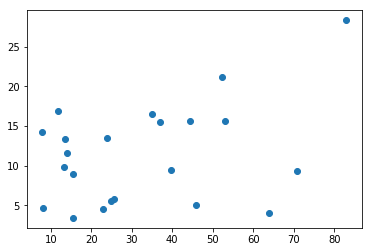

In [15]:
modelDeltaMedian = sm.OLS(FinalDFOECD.MedianSalGap, FinalDFOECD.DeltaPaidLeave)
resultsmodelDeltaMedian = modelDeltaMedian.fit()
display(resultsmodelDeltaMedian.summary())
plt.scatter(FinalDFOECD.DeltaPaidLeave,FinalDFOECD.MedianSalGap)

In [16]:
modelDeltaMedian2 = sm.OLS(endog=FinalDFOECD["MedianSalGap"], exog=FinalDFOECD[["MothersTotPaid","FathersTotPaid"]])
resultsmodelDeltaMedian2 = modelDeltaMedian2.fit()
display(resultsmodelDeltaMedian2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           MedianSalGap   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     32.69
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           4.97e-07
Time:                        19:45:26   Log-Likelihood:                -71.759
No. Observations:                  22   AIC:                             147.5
Df Residuals:                      20   BIC:                             149.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
MothersTotPaid     0.2364      0.041      5.780      0.000       0.151       0.322
FathersTotPaid     0.4890      0.332      1.474      0.156      -0.203       1.181
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.233
Skew:                          -0.220   Prob(JB):                        0.890
Kurtosis:                       2.754   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#FinalDF
#plt.bar(FinalDF.index, FinalDF.ratioMeanWage)